# Introduction #

Первое знакомство с новым набором данных иногда может показаться ошеломляющим. Вам могут быть представлены сотни или тысячи функций, даже без описания, на которое можно ориентироваться. С чего вы вообще начинаете?

Отличным первым шагом является построение рейтинга с помощью **показателя полезности функции**, функции, измеряющей связь между функцией и целью. Затем вы можете выбрать меньший набор наиболее полезных функций для первоначальной разработки и быть более уверенным в том, что ваше время будет потрачено с пользой.

Показатель, который мы будем использовать, называется "взаимная информация (**mutual information**)". Взаимная информация во многом похожа на корреляцию в том смысле, что она измеряет взаимосвязь между двумя величинами. Преимущество взаимной информации в том, что она может обнаруживать любые виды взаимосвязей, в то время как корреляция обнаруживает только линейные взаимосвязи.

Взаимная информация - отличный показатель общего назначения, который особенно полезен в начале разработки функций, когда вы, возможно, еще не знаете, какую модель хотели бы использовать. Это:
- простота в использовании и интерпретации,
- вычислительная эффективность,
- теоретически обоснованная,
- устойчив к переобучению и,
- способен обнаруживать любые взаимосвязи

# Mutual Information and What it Measures #

Взаимная информация описывает отношения в терминах "неопределенности" (*uncertainty*). The **mutual information** (MI) разница между двумя величинами - это показатель того, насколько знание одной величины уменьшает неопределенность в отношении другой. Если бы вы знали значение признака, насколько увереннее вы были бы в отношении цели?

Вот пример из данных *Ames Housing*. На рисунке показана взаимосвязь между внешним качеством дома и ценой, по которой он был продан. Каждая точка представляет дом.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/X12ARUK.png" width=400, alt="Four categories of ExterQual: Fair, Typical, Good, Excellent. A scatter plot of SalePrice within each category.">
<figcaption style="textalign: center; font-style: italic"><center>Знание внешнего вида дома снижает неопределенность в отношении его продажной цены.
</center></figcaption>
</figure>

Из рисунка мы можем видеть, что, зная значение `ExterQual` это должно сделать вас более уверенным в соответствующем `SalePrice` -- каждая категория `ExterQual` склонен к концентрации `SalePrice` в пределах определенного диапазона. Взаимная информация, которая `ExterQual` имеет с `SalePrice` представляет собой среднее снижение неопределенности в `SalePrice` взяты за основу четыре значения `ExterQual`. C `Fair` встречается реже, чем `Typical`, например, `Fair` получает меньший вес в баллах MI.

(Техническое примечание: то, что мы называем неопределенностью, измеряется с помощью величины из теории информации, известной как "энтропия". Энтропия переменной приблизительно означает: "сколько вопросов типа "да" или "нет" вам потребуется, чтобы описать возникновение этой переменной в среднем". Чем больше вопросов вам приходится задавать, тем больше у вас сомнений в отношении переменной. Взаимная информация - это количество вопросов, на которые вы ожидаете получить ответы от функции о цели.)

# Interpreting Mutual Information Scores #

Наименьшая возможная взаимная информация между величинами равна 0,0. Когда MI равно нулю, величины независимы: ни одна из них ничего не может сказать вам о другой. И наоборот, теоретически не существует верхней границы того, какой может быть MI. Однако на практике значения выше 2,0 или около того встречаются редко. (Взаимная информация является логарифмической величиной, поэтому она увеличивается очень медленно.)

Следующий рисунок даст вам представление о том, как значения MI соответствуют виду и степени связи объекта с целью.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/Dt75E1f.png" width=800, alt="">
<figcaption style="textalign: center; font-style: italic"><center><strong>Left:</strong> Mutual information increases as the dependence between feature and target becomes tighter. <strong>Right:</strong> Mutual information can capture any kind of association (not just linear, like correlation.)
</center></figcaption>
</figure>

Вот несколько вещей, которые следует помнить при использовании взаимной информации:
- MI может помочь вам понять "относительный потенциал" (*relative potential* ) объекта как предиктора цели, рассматриваемый сам по себе.
- Функция может быть очень информативной при взаимодействии с другими функциями, но не такой информативной сама по себе. MI *не может обнаружить взаимодействия* между функциями. Это **одномерная (univariate)** метрика.
- *actual* полезность функции *depends on the model you use it with*. Функция полезна только в той мере, в какой ее связь с объектом может быть изучена вашей моделью. То, что функция имеет высокий балл MI, не означает, что ваша модель сможет что-либо сделать с этой информацией. Возможно, вам сначала потребуется преобразовать функцию, чтобы выявить связь.

# Example - 1985 Automobiles #

Набор данных [*Automobile*](https://www.kaggle.com/toramky/automobile-dataset) состоит из 193 автомобилей 1985 модельного года. Цель этого набора данных - предсказать `price`  автомобиля (the target) на основе 23 характеристик автомобиля, таких как `make`, `body_style`, and `horsepower`. В этом примере мы проранжируем объекты с учетом взаимной информации и проанализируем результаты с помощью визуализации данных.

Эта скрытая ячейка импортирует некоторые библиотеки и загружает набор данных.

In [5]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")

df = pd.read_csv("autos.csv")
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


Алгоритм scikit-learn для MI обрабатывает дискретные объекты иначе, чем непрерывные. Следовательно, вам нужно указать, какие из них являются такими. Как показывает эмпирическое правило, все, что должно иметь тип "float", не является дискретным. Категориальные (`объектный` или `категориальный` тип) можно рассматривать как дискретные, присвоив им кодировку меток. ((Вы можете ознакомиться с кодировками меток в нашем уроке [Категориальные переменные](http://www.kaggle.com/alexis b cook/категориальные переменные).)

In [8]:
X = df.copy()
y = X.pop("price")

# Кодирование меток для категориальных
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# Все дискретные объекты теперь должны иметь целочисленные типы (дважды проверьте это перед использованием MI!).
discrete_features = X.dtypes == int

В Scikit-learn есть две взаимные информационные метрики. `feature_selection` модуль: один для реальных целей (`mutual_info_regression`) и еще один для категориальных целей (`mutual_info_classif`). Our target, `price`, имеет действительное значение. В следующей ячейке вычисляются значения MI для наших функций и они отображаются в удобном формате данных.

In [9]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # покажите несколько функций с их оценками MI

curb_weight          1.472206
highway_mpg          0.951903
length               0.600032
bore                 0.488083
stroke               0.391841
drive_wheels         0.332448
compression_ratio    0.133060
fuel_type            0.048120
Name: MI Scores, dtype: float64

А теперь линейчатый график, облегчающий сравнение:

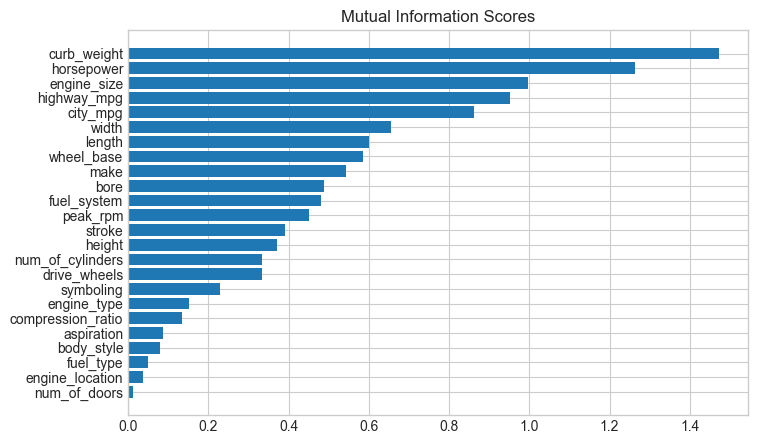

In [10]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

Визуализация данных является отличным дополнением к рейтингу полезности. Давайте подробнее рассмотрим несколько из них.

Как и следовало ожидать, самые высокие оценки `curb_weight` особенность демонстрирует тесную связь с `price`, the target.


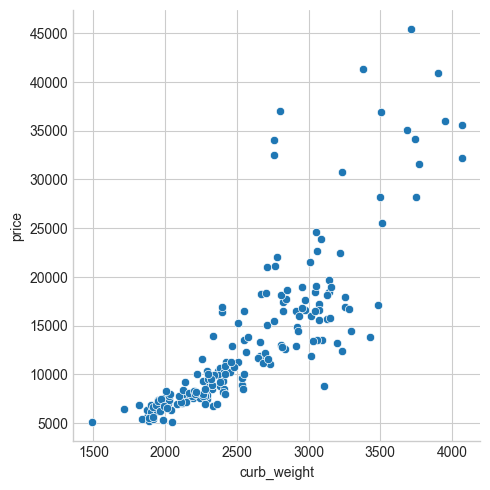

In [11]:
sns.relplot(x="curb_weight", y="price", data=df);

The `fuel_type` функция имеет довольно низкий балл MI, но, как мы можем видеть из рисунка, она четко разделяет два `price` группы населения с различными тенденциями в пределах `horsepower` особенность. Это указывает на то, что`fuel_type` вносит свой вклад в эффект взаимодействия и, в конечном счете, может быть не так уж и маловажен. Прежде чем принимать решение о том, является ли функция неважной на основании ее оценки MI, полезно изучить все возможные эффекты взаимодействия - знание предметной области может помочь в этом вопросе.

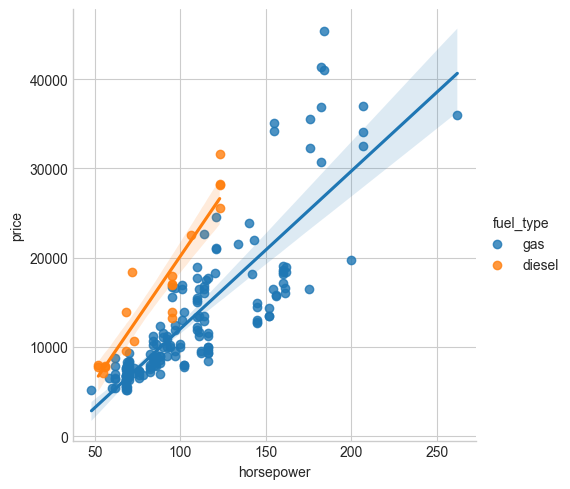

In [12]:
sns.lmplot(x="horsepower", y="price", hue="fuel_type", data=df);